In [7]:
import pymysql.cursors
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
%matplotlib inline

color = sns.color_palette()

In [9]:
import sqlite3
conn = sqlite3.connect('instacart.db')

In [10]:
aisles = pd.read_sql("select * from aisles", con= conn)

In [11]:
orders = pd.read_sql("select * from orders join order_products on order_products.order_id = orders.order_id join products on products.product_id = order_products.product_id join aisles on products.aisle_id = aisles.aisle_id join departments on departments.department_id = products.department_id", con= conn)

In [12]:
df = orders.loc[:,~orders.columns.duplicated()]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3923788 entries, 0 to 3923787
Data columns (total 15 columns):
order_id                  int64
user_id                   int64
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
product_id                int64
add_to_cart_order         int64
reordered                 int64
index                     int64
product_name              object
aisle_id                  int64
department_id             int64
aisle                     object
department                object
dtypes: float64(1), int64(11), object(3)
memory usage: 449.0+ MB


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3923788 entries, 0 to 3923787
Data columns (total 21 columns):
order_id                  int64
user_id                   int64
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
order_id                  int64
product_id                int64
add_to_cart_order         int64
reordered                 int64
index                     int64
product_id                int64
product_name              object
aisle_id                  int64
department_id             int64
index                     int64
aisle_id                  int64
aisle                     object
index                     int64
department_id             int64
department                object
dtypes: float64(1), int64(17), object(3)
memory usage: 628.7+ MB


In [32]:
order_products = pd.read_sql("select * from orders",con=conn)

In [41]:
order_products

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2168274,2,1,2,11,NaN
1,1501582,2,2,5,10,10.0
2,1901567,2,3,1,10,3.0
3,738281,2,4,2,10,8.0
4,1673511,2,5,3,11,8.0
5,1199898,2,6,2,9,13.0
6,3194192,2,7,2,12,14.0
7,788338,2,8,1,15,27.0
8,1718559,2,9,2,9,8.0
9,1447487,2,10,1,11,6.0


In [40]:
len(order_products['user_id'].unique())

25000

/Users/ashley/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


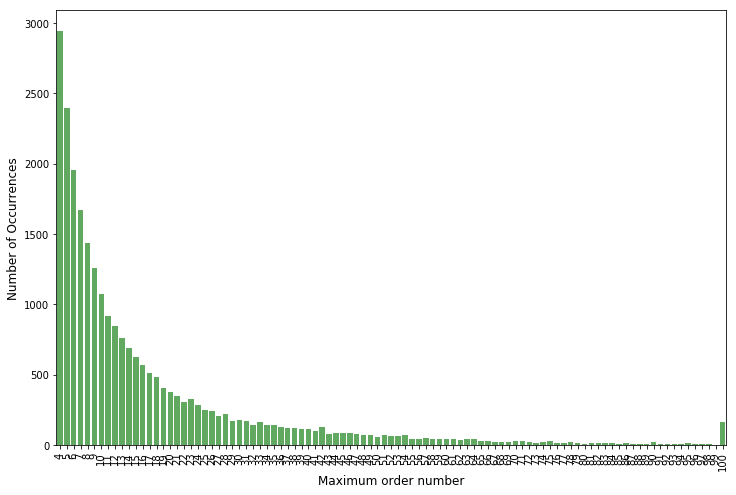

In [44]:
cnt_srs = order_products.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

/Users/ashley/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


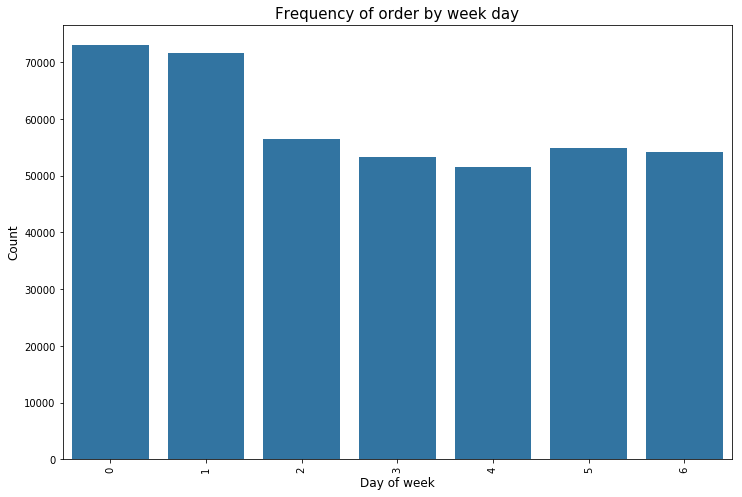

In [46]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=order_products, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

/Users/ashley/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


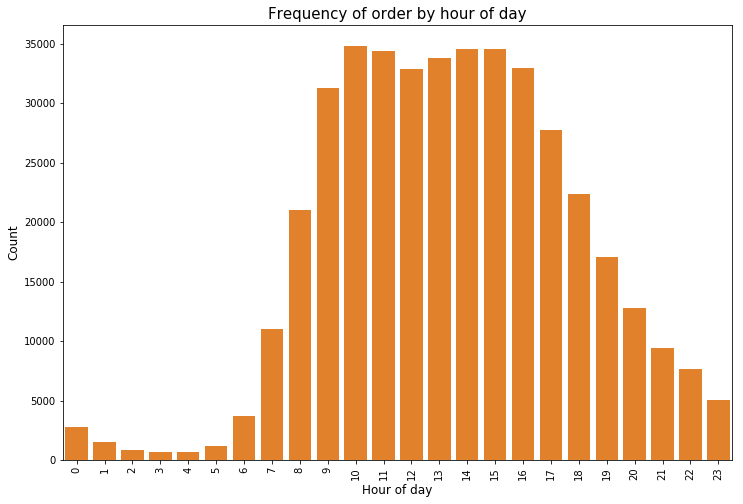

In [48]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=order_products, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

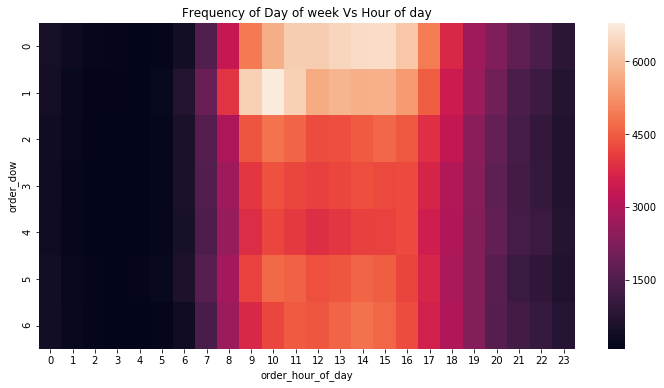

In [49]:
grouped_df = order_products.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

/Users/ashley/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


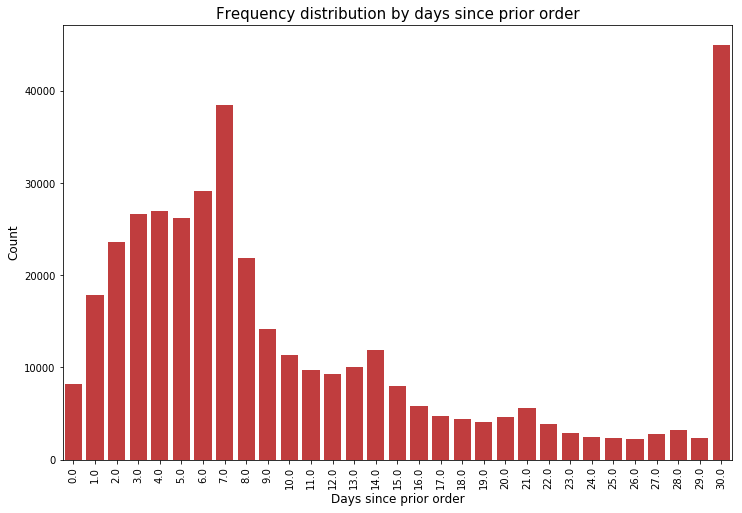

In [51]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=order_products, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

In [55]:
order_products.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2168274,2,1,2,11,NaN
1,1501582,2,2,5,10,10.0
2,1901567,2,3,1,10,3.0
3,738281,2,4,2,10,8.0
4,1673511,2,5,3,11,8.0


In [69]:
orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_id,product_id,add_to_cart_order,reordered,...,product_name,aisle_id,department_id,index,aisle_id,aisle,index,department_id,department,organic
0,2168274,2,1,2,11,NaN,2168274,12000,4,0,...,Baked Organic Sea Salt Crunchy Pea Snack,72,13,71,72,condiments,12,13,pantry,1
1,2168274,2,1,2,11,NaN,2168274,13176,12,0,...,Bag of Organic Bananas,24,4,23,24,fresh fruits,3,4,produce,1
2,2168274,2,1,2,11,NaN,2168274,16589,7,0,...,Plantain Chips,107,19,106,107,chips pretzels,18,19,snacks,0
3,2168274,2,1,2,11,NaN,2168274,20574,3,0,...,Roasted Turkey,96,20,95,96,lunch meat,19,20,deli,0
4,2168274,2,1,2,11,NaN,2168274,22474,6,0,...,Cheddar Bunnies Snack Crackers,78,19,77,78,crackers,18,19,snacks,0
5,2168274,2,1,2,11,NaN,2168274,27344,9,0,...,Uncured Genoa Salami,96,20,95,96,lunch meat,19,20,deli,0
6,2168274,2,1,2,11,NaN,2168274,27966,11,0,...,Organic Raspberries,123,4,122,123,packaged vegetables fruits,3,4,produce,1
7,2168274,2,1,2,11,NaN,2168274,30489,10,0,...,Original Hummus,67,20,66,67,fresh dips tapenades,19,20,deli,0
8,2168274,2,1,2,11,NaN,2168274,32792,1,0,...,Chipotle Beef & Pork Realstick,23,19,22,23,popcorn jerky,18,19,snacks,0
9,2168274,2,1,2,11,NaN,2168274,35917,8,0,...,Organic Just Concord Grape Juice,98,7,97,98,juice nectars,6,7,beverages,1


In [43]:
df['organic'] = df['product_name'].apply(lambda x: x.lower()).str.contains('organic').astype(np.int8)

/Users/ashley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_all = orders.T.drop_duplicates().T

In [ ]:
orders_df = orders.loc[:,~orders.columns.duplicated()]

In [73]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3923788 entries, 0 to 3923787
Data columns (total 20 columns):
user_id                   int64
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
product_id                int64
add_to_cart_order         int64
reordered                 int64
index                     int64
product_id                int64
product_name              object
aisle_id                  int64
department_id             int64
index                     int64
aisle_id                  int64
aisle                     object
index                     int64
department_id             int64
department                object
organic                   int8
dtypes: float64(1), int64(15), int8(1), object(3)
memory usage: 572.5+ MB


/Users/ashley/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0,0.5,'% of Orders')

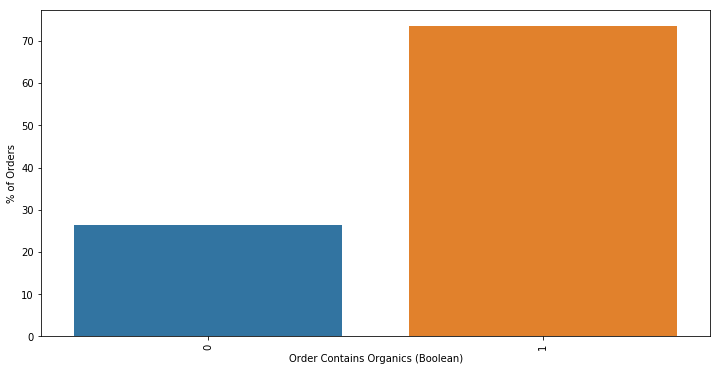

In [13]:
org = df.groupby('order_id')['organic'].aggregate("max").value_counts()

# plot it
plt.figure(figsize=(12, 6))
sns.barplot(org.index, org / org.sum() * 100)
plt.xticks(rotation='vertical')
plt.xlabel('Order Contains Organics (Boolean)')
plt.ylabel('% of Orders')

In [14]:
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,index,product_name,aisle_id,department_id,aisle,department,organic
0,2168274,2,1,2,11,NaN,12000,4,0,11999,Baked Organic Sea Salt Crunchy Pea Snack,72,13,condiments,pantry,1
1,2168274,2,1,2,11,NaN,13176,12,0,13175,Bag of Organic Bananas,24,4,fresh fruits,produce,1
2,2168274,2,1,2,11,NaN,16589,7,0,16588,Plantain Chips,107,19,chips pretzels,snacks,0
3,2168274,2,1,2,11,NaN,20574,3,0,20573,Roasted Turkey,96,20,lunch meat,deli,0
4,2168274,2,1,2,11,NaN,22474,6,0,22473,Cheddar Bunnies Snack Crackers,78,19,crackers,snacks,0
5,2168274,2,1,2,11,NaN,27344,9,0,27343,Uncured Genoa Salami,96,20,lunch meat,deli,0
6,2168274,2,1,2,11,NaN,27966,11,0,27965,Organic Raspberries,123,4,packaged vegetables fruits,produce,1
7,2168274,2,1,2,11,NaN,30489,10,0,30488,Original Hummus,67,20,fresh dips tapenades,deli,0
8,2168274,2,1,2,11,NaN,32792,1,0,32791,Chipotle Beef & Pork Realstick,23,19,popcorn jerky,snacks,0
9,2168274,2,1,2,11,NaN,35917,8,0,35916,Organic Just Concord Grape Juice,98,7,juice nectars,beverages,1


In [19]:
df.groupby('user_id')['order_id'].count().describe()

count    25000.000000
mean       156.951520
std        204.548183
min          3.000000
25%         39.000000
50%         83.000000
75%        186.000000
max       2561.000000
Name: order_id, dtype: float64

In [46]:
reorders = df[df['reordered'] == 1]
not_reordered = df[df['reordered'] == 0]
len(reorders)/len(not_reordered)

1.4302266166308575

/Users/ashley/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0,0.5,'% of Orders')

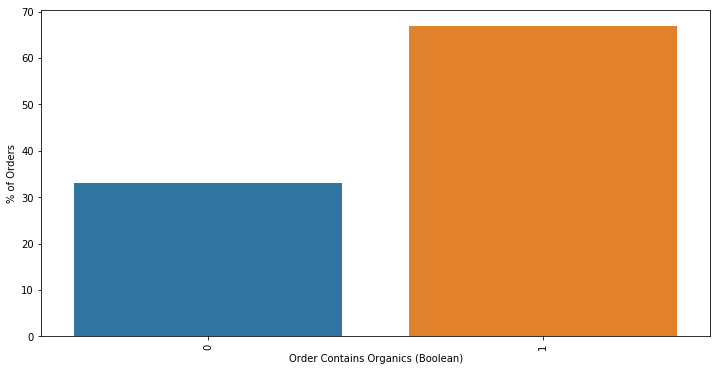

In [22]:
org = reorders.groupby('order_id')['organic'].aggregate("max").value_counts()

# plot it
plt.figure(figsize=(12, 6))
sns.barplot(org.index, org / org.sum() * 100)
plt.xticks(rotation='vertical')
plt.xlabel('Order Contains Organics (Boolean)')
plt.ylabel('% of Orders')

/Users/ashley/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0,0.5,'% of Orders')

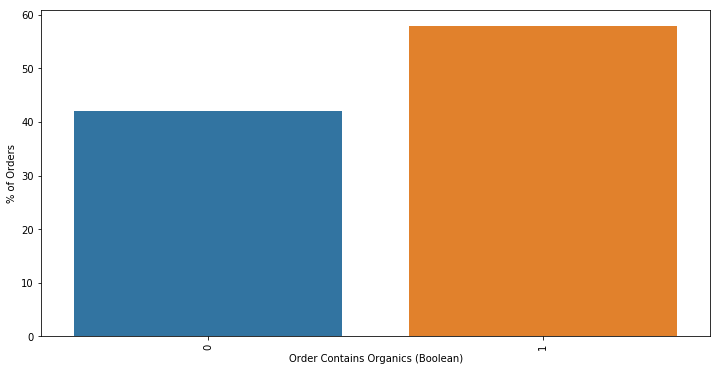

In [24]:
org = not_reordered.groupby('order_id')['organic'].aggregate("max").value_counts()

# plot it
plt.figure(figsize=(12, 6))
sns.barplot(org.index, org / org.sum() * 100)
plt.xticks(rotation='vertical')
plt.xlabel('Order Contains Organics (Boolean)')
plt.ylabel('% of Orders')

In [50]:
department_counts = df.groupby(['department'])['add_to_cart_order'].sum()

In [51]:
department_counts

department
alcohol             102368
babies              568069
bakery             1133615
beverages          2260956
breakfast           770989
bulk                 34965
canned goods       1257584
dairy eggs         4885874
deli               1083152
dry goods pasta    1074983
frozen             2438330
household           754544
international       325042
meat seafood        720061
missing              78418
other                36390
pantry             2158437
personal care       472750
pets                 89963
produce            9216927
snacks             3214302
Name: add_to_cart_order, dtype: int64

In [55]:
department_counts.index.tolist()

['alcohol',
 'babies',
 'bakery',
 'beverages',
 'breakfast',
 'bulk',
 'canned goods',
 'dairy eggs',
 'deli',
 'dry goods pasta',
 'frozen',
 'household',
 'international',
 'meat seafood',
 'missing',
 'other',
 'pantry',
 'personal care',
 'pets',
 'produce',
 'snacks']

In [68]:
percent = []
for department,val in zip(department_counts.index.tolist(),department_counts):
    dep = reordered_grouped[department]
    percent.append(dep[0]/val)
    percent.append(dep[1]/val)
df_reordered['percentage_of_purchased'] = percent    
        
        

In [82]:
df_reordered

,reordered,department,add_to_cart_order,percentage_of_purchased
0,0,alcohol,49463,0.483188
1,1,alcohol,52905,0.516812
2,0,babies,265874,0.468031
3,1,babies,302195,0.531969
4,0,bakery,485715,0.428466
5,1,bakery,647900,0.571534
6,0,beverages,952862,0.421442
7,1,beverages,1308094,0.578558
8,0,breakfast,374168,0.485309
9,1,breakfast,396821,0.514691


In [81]:
df_reordered.reset_index(level=0, inplace=True)

In [83]:
df_reordered[df_reordered['reordered']==1].nlargest(20, columns=['percentage_of_purchased'])

,reordered,department,add_to_cart_order,percentage_of_purchased
15,1,dairy eggs,2973700,0.608632
39,1,produce,5541109,0.601188
7,1,beverages,1308094,0.578558
5,1,bakery,647900,0.571534
17,1,deli,600315,0.554230
37,1,pets,48875,0.543279
3,1,babies,302195,0.531969
27,1,meat seafood,379925,0.527629
41,1,snacks,1678416,0.522171
1,1,alcohol,52905,0.516812


In [67]:
df_reordered

add_to_cart_order
department      reordered                   
alcohol         0                      49463
                1                      52905
babies          0                     265874
                1                     302195
bakery          0                     485715
                1                     647900
beverages       0                     952862
                1                    1308094
breakfast       0                     374168
                1                     396821
bulk            0                      17203
                1                      17762
canned goods    0                     718620
                1                     538964
dairy eggs      0                    1912174
                1                    2973700
deli            0                     482837
                1                     600315
dry goods pasta 0                     606757
                1                     468226
frozen          0                    1255229
                1                    1183101
household       0                     467338
                1                     287206
international   0                     211503
                1                     113539
meat seafood    0                     340136
                1                     379925
missing         0                      52292
                1                      26126
other           0                      23821
                1                      12569
pantry          0                    1455903
                1                     702534
personal care   0                     331522
                1                     141228
pets            0                      41088
                1                      48875
produce         0                    3675818
                1                    5541109
snacks          0                    1535886
                1                    1678416

department       reordered
alcohol          0              49463
                 1              52905
babies           0             265874
                 1             302195
bakery           0             485715
                 1             647900
beverages        0             952862
                 1            1308094
breakfast        0             374168
                 1             396821
bulk             0              17203
                 1              17762
canned goods     0             718620
                 1             538964
dairy eggs       0            1912174
                 1            2973700
deli             0             482837
                 1             600315
dry goods pasta  0             606757
                 1             468226
frozen           0            1255229
                 1            1183101
household        0             467338
                 1             287206
international    0             211503
                 1     

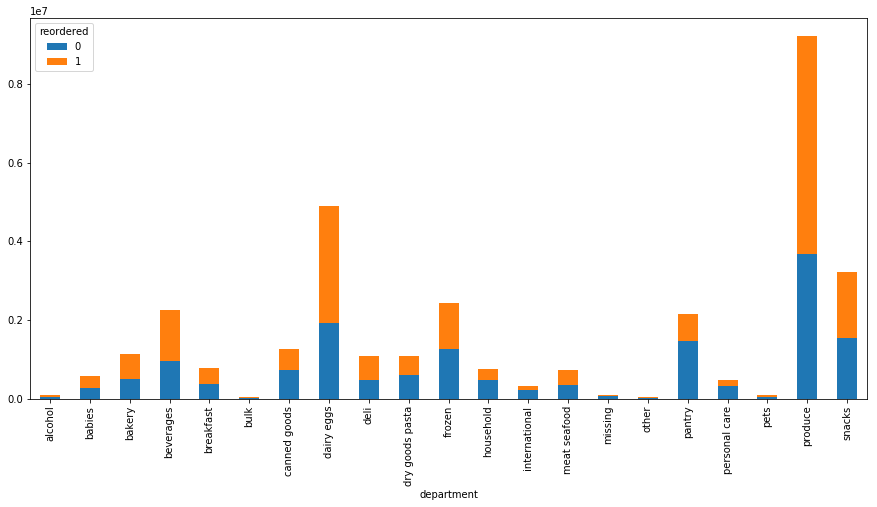

In [66]:
fig, ax = plt.subplots(figsize=(15,7))
reordered_grouped= df.groupby(['department','reordered'])['add_to_cart_order'].sum()
reordered_grouped.unstack().plot(kind='bar', ax=ax, stacked=True)
print(reordered_grouped)
df_reordered = pd.DataFrame(reordered_grouped)

In [34]:
not_reordered.groupby('department')['add_to_cart_order'].sum().nlargest(20)

department
produce            3675818
dairy eggs         1912174
snacks             1535886
pantry             1455903
frozen             1255229
beverages           952862
canned goods        718620
dry goods pasta     606757
bakery              485715
deli                482837
household           467338
breakfast           374168
meat seafood        340136
personal care       331522
babies              265874
international       211503
missing              52292
alcohol              49463
pets                 41088
other                23821
Name: add_to_cart_order, dtype: int64

In [31]:
reorders.groupby('department')['add_to_cart_order'].sum().nlargest(20)

department
produce            5541109
dairy eggs         2973700
snacks             1678416
beverages          1308094
frozen             1183101
pantry              702534
bakery              647900
deli                600315
canned goods        538964
dry goods pasta     468226
breakfast           396821
meat seafood        379925
babies              302195
household           287206
personal care       141228
international       113539
alcohol              52905
pets                 48875
missing              26126
bulk                 17762
Name: add_to_cart_order, dtype: int64

In [29]:
reorders.groupby('aisle')['add_to_cart_order'].sum().nlargest(20)

aisle
fresh fruits                     2105432
fresh vegetables                 2056986
packaged vegetables fruits       1068172
yogurt                            871832
packaged cheese                   575731
milk                              441038
chips pretzels                    430228
water seltzer sparkling water     415696
soy lactosefree                   326852
bread                             325064
energy granola bars               305100
refrigerated                      302252
frozen produce                    287769
baby food formula                 284459
crackers                          270763
eggs                              228636
ice cream ice                     227657
lunch meat                        223189
cereal                            213072
fresh herbs                       210153
Name: add_to_cart_order, dtype: int64

In [85]:
dairy_reorders= reorders[reorders['department'] == 'dairy eggs']

In [88]:
dairy_reorders.groupby('product_name')['add_to_cart_order'].sum().nlargest(10)

product_name
Organic Whole Milk                                                68685
Organic Whole String Cheese                                       41455
Organic Half & Half                                               39791
Half & Half                                                       39650
Organic Unsweetened Almond Milk                                   32562
Grated Parmesan                                                   30749
Unsweetened Almondmilk                                            27454
Organic Reduced Fat 2% Milk                                       26607
Shredded Parmesan                                                 24595
Organic Sticks Low Moisture Part Skim Mozzarella String Cheese    23013
Name: add_to_cart_order, dtype: int64

In [91]:
dairy_reorders[dairy_reorders['user_id'] == 2]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,index,product_name,aisle_id,department_id,aisle,department,organic
89,788338,2,8,1,15,27.0,17758,8,1,17757,Strawberry Rhubarb Yoghurt,120,16,yogurt,dairy eggs,0
97,788338,2,8,1,15,27.0,40198,9,1,40197,Blueberry Yoghurt,120,16,yogurt,dairy eggs,0
98,788338,2,8,1,15,27.0,46886,10,1,46885,Raspberry Yoghurt,120,16,yogurt,dairy eggs,0
101,1718559,2,9,2,9,8.0,1559,13,1,1558,Cherry Pomegranate Greek Yogurt,120,16,yogurt,dairy eggs,0
104,1718559,2,9,2,9,8.0,7781,6,1,7780,Organic Sticks Low Moisture Part Skim Mozzarel...,21,16,packaged cheese,dairy eggs,1
110,1718559,2,9,2,9,8.0,17872,16,1,17871,Total 2% Lowfat Plain Greek Yogurt,120,16,yogurt,dairy eggs,0
111,1718559,2,9,2,9,8.0,18523,15,1,18522,Total 2% All Natural Greek Strained Yogurt wit...,120,16,yogurt,dairy eggs,0
113,1718559,2,9,2,9,8.0,19156,12,1,19155,Fat Free Blueberry Yogurt,120,16,yogurt,dairy eggs,0
115,1718559,2,9,2,9,8.0,22124,11,1,22123,Total 0% Raspberry Yogurt,120,16,yogurt,dairy eggs,0
121,1718559,2,9,2,9,8.0,33754,10,1,33753,Total 2% with Strawberry Lowfat Greek Strained...,120,16,yogurt,dairy eggs,0


In [19]:
reorder_trends = df[df['days_since_prior_order'].isin([30.0,7.0])]

department       days_since_prior_order
produce          7.0                       1081711
                 30.0                       861052
dairy eggs       7.0                        581926
                 30.0                       464993
snacks           7.0                        415064
                 30.0                       287120
frozen           7.0                        268924
                 30.0                       264189
beverages        7.0                        263867
pantry           7.0                        236081
                 30.0                       226119
beverages        30.0                       220496
canned goods     7.0                        148990
                 30.0                       133611
bakery           7.0                        128609
deli             7.0                        125991
dry goods pasta  7.0                        119502
                 30.0                       115491
bakery           30.0                     

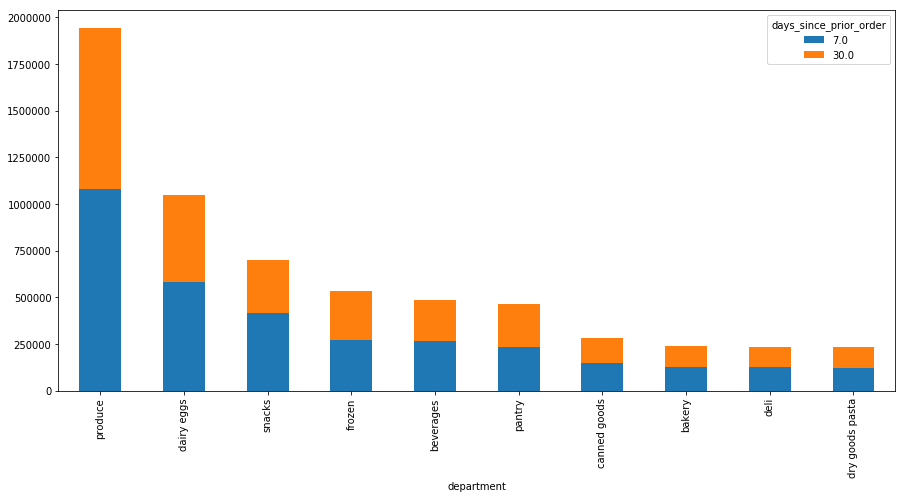

In [22]:
fig, ax = plt.subplots(figsize=(15,7))
cart_triends = reorder_trends.groupby(['department','days_since_prior_order'])['add_to_cart_order'].sum().nlargest(20)
cart_triends.unstack().plot(kind='bar', ax=ax, stacked=True)
print(cart_triends)

In [35]:
# fig, ax = plt.subplots(figsize=(15,7))
reorders.groupby(['product_name','days_since_prior_order'])['add_to_cart_order'].sum().nlargest(50)
# cart_triends.unstack().plot(kind='bar', ax=ax, stacked=True)

product_name            days_since_prior_order
Banana                  7.0                       32058
Organic Strawberries    7.0                       24333
Bag of Organic Bananas  7.0                       23198
Banana                  6.0                       21326
Organic Baby Spinach    7.0                       21003
Banana                  30.0                      19192
Bag of Organic Bananas  6.0                       17875
Banana                  5.0                       17322
Organic Hass Avocado    7.0                       17149
Organic Strawberries    6.0                       17138
Banana                  4.0                       17020
                        8.0                       16644
Organic Strawberries    4.0                       16081
Bag of Organic Bananas  4.0                       15910
Organic Strawberries    5.0                       15835
Bag of Organic Bananas  5.0                       15626
Banana                  3.0                       14501
B

In [47]:
produce_reorders = reorders[reorders['department'] == 'produce']

In [41]:
produce_reorders.groupby('product_name')['add_to_cart_order'].sum().nlargest(50)

product_name
Banana                                  233757
Bag of Organic Bananas                  183786
Organic Strawberries                    178504
Organic Baby Spinach                    162357
Organic Hass Avocado                    133475
Organic Avocado                         102110
Limes                                    97130
Large Lemon                              97072
Organic Raspberries                      84882
Strawberries                             79518
Organic Yellow Onion                     78310
Organic Garlic                           77024
Organic Zucchini                         72903
Organic Grape Tomatoes                   61084
Cucumber Kirby                           60862
Organic Blueberries                      57905
Organic Cucumber                         56593
Apple Honeycrisp Organic                 55082
Organic Lemon                            54108
Seedless Red Grapes                      51269
Fresh Cauliflower                        49628


In [23]:
df.to_csv('instacrt.csv')

In [164]:
df[df['user_id'] == 2].sort_values('order_number')['days_since_prior_order'].describe()

count    182.000000
mean      15.967033
std        9.119769
min        3.000000
25%        8.000000
50%       13.000000
75%       27.000000
max       30.000000
Name: days_since_prior_order, dtype: float64

In [165]:
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,index,product_name,aisle_id,department_id,aisle,department,organic,organic kale
0,2168274,2,1,2,11,NaN,12000,4,0,11999,Baked Organic Sea Salt Crunchy Pea Snack,72,13,condiments,pantry,1,NaN
1,2168274,2,1,2,11,NaN,13176,12,0,13175,Bag of Organic Bananas,24,4,fresh fruits,produce,1,NaN
2,2168274,2,1,2,11,NaN,16589,7,0,16588,Plantain Chips,107,19,chips pretzels,snacks,0,NaN
3,2168274,2,1,2,11,NaN,20574,3,0,20573,Roasted Turkey,96,20,lunch meat,deli,0,NaN
4,2168274,2,1,2,11,NaN,22474,6,0,22473,Cheddar Bunnies Snack Crackers,78,19,crackers,snacks,0,NaN
5,2168274,2,1,2,11,NaN,27344,9,0,27343,Uncured Genoa Salami,96,20,lunch meat,deli,0,NaN
6,2168274,2,1,2,11,NaN,27966,11,0,27965,Organic Raspberries,123,4,packaged vegetables fruits,produce,1,NaN
7,2168274,2,1,2,11,NaN,30489,10,0,30488,Original Hummus,67,20,fresh dips tapenades,deli,0,NaN
8,2168274,2,1,2,11,NaN,32792,1,0,32791,Chipotle Beef & Pork Realstick,23,19,popcorn jerky,snacks,0,NaN
9,2168274,2,1,2,11,NaN,35917,8,0,35916,Organic Just Concord Grape Juice,98,7,juice nectars,beverages,1,NaN


In [109]:
organic_reorders = produce_reorders[produce_reorders['organic'] == 1]

In [95]:
organic_buyers = list(df[df['organic'] == 1]['user_id'].unique())

In [98]:
unorganic = df[df['organic']==0]
buys_both = unorganic[unorganic['user_id'].isin(organic_buyers)]

In [101]:
len(buys_both['user_id'].unique())

22903

In [104]:
len(buys_both['user_id'].unique())/len(organic_buyers)

0.9988660648087575

In [107]:
buys_both.groupby('department')['add_to_cart_order'].sum().nlargest(20)

department
produce            4120518
dairy eggs         3378928
snacks             2578183
beverages          1869913
frozen             1858222
pantry             1605293
bakery              893309
deli                875076
dry goods pasta     746273
household           712958
canned goods        612846
breakfast           583492
meat seafood        555204
personal care       427493
babies              313377
international       267240
alcohol              90719
pets                 80362
missing              41451
other                33433
Name: add_to_cart_order, dtype: int64

In [158]:
buys_both[buys_both['department'] == 'produce'].groupby('product_name')['add_to_cart_order'].sum().nlargest(50)

product_name
Banana                             281285
Limes                              146725
Large Lemon                        144747
Strawberries                       119686
Cucumber Kirby                      92845
Seedless Red Grapes                 80356
Fresh Cauliflower                   79341
Carrots                             76890
Yellow Onions                       73640
Honeycrisp Apple                    71403
Asparagus                           71292
Green Bell Pepper                   61972
Red Peppers                         61505
Red Vine Tomato                     53857
Bunched Cilantro                    48772
Jalapeno Peppers                    44120
Red Onion                           43202
Orange Bell Pepper                  43149
Broccoli Crown                      42221
Small Hass Avocado                  41420
Grape White/Green Seedless          41200
Raspberries                         41144
Clementines, Bag                    39987
Roma Tomato          

In [133]:
dirty_kale_luvers = list(buys_both[buys_both['product_name'] =='100% Baby Kale']['user_id'].unique())

In [121]:
df['organic'] = df['product_name'].apply(lambda x: x.lower()).str.contains('organic').astype(np.int8)

/Users/ashley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [123]:
organic_reorders['organic kale'] = organic_reorders['product_name'].apply(lambda x: x.lower()).str.contains('kale').astype(np.int8)

/Users/ashley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [126]:
organic_kale_reorders = organic_reorders[organic_reorders['organic kale'] == 1]

In [128]:
kale_luvers= list(organic_kale_reorders['user_id'].unique())

In [136]:
get_organddirty_kale = list(organic_kale_reorders[organic_kale_reorders['user_id'].isin(dirty_kale_luvers)]['user_id'].unique())


Num people that ordered organic and non organic kale

In [137]:
len(get_organddirty_kale)

21

In [139]:
len(organic_reorders[organic_reorders['organic kale'] == 1]['user_id'].unique())

2814

In [140]:
unorganic

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,index,product_name,aisle_id,department_id,aisle,department,organic
2,2168274,2,1,2,11,NaN,16589,7,0,16588,Plantain Chips,107,19,chips pretzels,snacks,0
3,2168274,2,1,2,11,NaN,20574,3,0,20573,Roasted Turkey,96,20,lunch meat,deli,0
4,2168274,2,1,2,11,NaN,22474,6,0,22473,Cheddar Bunnies Snack Crackers,78,19,crackers,snacks,0
5,2168274,2,1,2,11,NaN,27344,9,0,27343,Uncured Genoa Salami,96,20,lunch meat,deli,0
7,2168274,2,1,2,11,NaN,30489,10,0,30488,Original Hummus,67,20,fresh dips tapenades,deli,0
8,2168274,2,1,2,11,NaN,32792,1,0,32791,Chipotle Beef & Pork Realstick,23,19,popcorn jerky,snacks,0
10,2168274,2,1,2,11,NaN,45066,13,0,45065,Honeycrisp Apple,24,4,fresh fruits,produce,0
12,2168274,2,1,2,11,NaN,48110,5,0,48109,Thin Stackers Brown Rice Lightly Salted,78,19,crackers,snacks,0
13,1501582,2,2,5,10,10.0,8138,6,0,8137,Traditional Hummus,67,20,fresh dips tapenades,deli,0
14,1501582,2,2,5,10,10.0,8479,3,0,8478,Original Black Box Tablewater Cracker,78,19,crackers,snacks,0


In [141]:
unorganic['organic kale'] = unorganic['product_name'].apply(lambda x: x.lower()).str.contains('kale').astype(np.int8)

/Users/ashley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [144]:
reordered_unorganic = unorganic[unorganic['reordered'] ==1]

In [148]:
len(reordered_unorganic[reordered_unorganic['organic kale'] ==1]['user_id'].unique())

2102

In [159]:
reorders['bananas'] = reorders['product_name'].apply(lambda x: x.lower()).str.contains('bananas').astype(np.int8)

/Users/ashley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [155]:
len(reorders[reorders['kale'] == 1]['user_id'].unique())

4525

In [156]:
2102+2814+21

4937

In [168]:
ban_reorders = reorders[reorders['bananas'] ==1]

In [169]:
len(ban_reorders['user_id'].unique())

5762

In [170]:
len(ban_reorders[ban_reorders['organic']==1]['user_id'].unique())

5615

In [171]:
len(ban_reorders[ban_reorders['organic']==0]['user_id'].unique())

166

In [173]:
reordered_organic_bananas = list(ban_reorders[ban_reorders['organic']==1]['user_id'])

In [176]:
reordered_dirty_bananas = ban_reorders[ban_reorders['organic']==0]

In [179]:
len(reordered_dirty_bananas[reordered_dirty_bananas['user_id'].isin(reordered_organic_bananas)]['user_id'].unique())

19

In [183]:
organic_buyers_df = df[df['user_id'].isin(organic_buyers)]

In [184]:
organic_buyers_df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,index,product_name,aisle_id,department_id,aisle,department,organic,organic kale
0,2168274,2,1,2,11,NaN,12000,4,0,11999,Baked Organic Sea Salt Crunchy Pea Snack,72,13,condiments,pantry,1,NaN
1,2168274,2,1,2,11,NaN,13176,12,0,13175,Bag of Organic Bananas,24,4,fresh fruits,produce,1,NaN
2,2168274,2,1,2,11,NaN,16589,7,0,16588,Plantain Chips,107,19,chips pretzels,snacks,0,NaN
3,2168274,2,1,2,11,NaN,20574,3,0,20573,Roasted Turkey,96,20,lunch meat,deli,0,NaN
4,2168274,2,1,2,11,NaN,22474,6,0,22473,Cheddar Bunnies Snack Crackers,78,19,crackers,snacks,0,NaN
5,2168274,2,1,2,11,NaN,27344,9,0,27343,Uncured Genoa Salami,96,20,lunch meat,deli,0,NaN
6,2168274,2,1,2,11,NaN,27966,11,0,27965,Organic Raspberries,123,4,packaged vegetables fruits,produce,1,NaN
7,2168274,2,1,2,11,NaN,30489,10,0,30488,Original Hummus,67,20,fresh dips tapenades,deli,0,NaN
8,2168274,2,1,2,11,NaN,32792,1,0,32791,Chipotle Beef & Pork Realstick,23,19,popcorn jerky,snacks,0,NaN
9,2168274,2,1,2,11,NaN,35917,8,0,35916,Organic Just Concord Grape Juice,98,7,juice nectars,beverages,1,NaN


In [189]:
organic_buyers_df.groupby(['organic'])['add_to_cart_order'].median()

organic
0    6
1    6
Name: add_to_cart_order, dtype: int64